In [1]:
# imports

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from astropy import units as u
from numpy import ma
import numpy as np
from astropy.table import Table, Column, MaskedColumn, pprint
from astropy.io import fits
from astropy.wcs import WCS
from scipy import integrate
from astropy.coordinates import SkyCoord

import astropy.units as u


from NIRSpec_norm import *

In [2]:

filepath = '/Users/s2537809/Downloads/gds-udeep-v3_prism-clear_3215_265801.spec.fits'
#filepath = '/Users/s2537809/Downloads/cosmos-transients-v3_prism-clear_6585_11272.spec.fits'
#filepath = '/Users/s2537809/Downloads/jades-gds-wide2-v3_prism-clear_1180_105840.spec.fits'
#filepath = '/Users/s2537809/Downloads/gds-udeep-v3_prism-clear_3215_113056.spec.fits'

tab = Table.read(filepath, format='fits')

tab

# Redshift


z = 9.4385
#z = 5.9440


In [3]:
tab

wave,flux,err,sky,path_corr,npix,norm_corr,flux_sum,profile_sum,var_sum
um,uJy,uJy,uJy,,,,,,
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.58,--,--,--,--,0.0,--,0.0,0.0,0.0
0.5836851085753291,--,--,--,--,0.0,--,0.0,0.0,0.0
0.5874378771811705,--,--,--,--,0.0,--,0.0,0.0,0.0
0.591260215571612,--,--,--,--,0.0,--,0.0,0.0,0.0
0.5951542612478814,--,--,--,--,0.0,--,0.0,0.0,0.0
0.5991219350103587,--,--,--,--,0.0,--,0.0,0.0,0.0
0.6031652486825945,-0.007672857145876609,0.0031370790059322543,0.005350439823142702,1.2330348996784237,172.0,1.0152484521430793,-0.5917071796281094,31.77121477272592,0.023610437845469137
0.6072866429848921,0.0026173763492408613,0.0023985686687850905,0.003948030917045336,1.2513570905562055,275.0,1.0173457332817553,0.34949958777623097,52.17460643217744,0.038109178916915426


In [4]:
# print flux range 
print('Flux range: ', np.min(tab['flux']), np.max(tab['flux']))

Flux range:  -0.007672857145876609 2.394144907496262


angstrom observed: 5799.999999999998 Angstrom 53366.181712699516 Angstrom
micron observed: 0.58 5.3366181712699525
angstrom rest: 555.6353882262775 Angstrom 5112.4377748430825 Angstrom
micron rest: 0.055563538822627774 0.5112437774843084


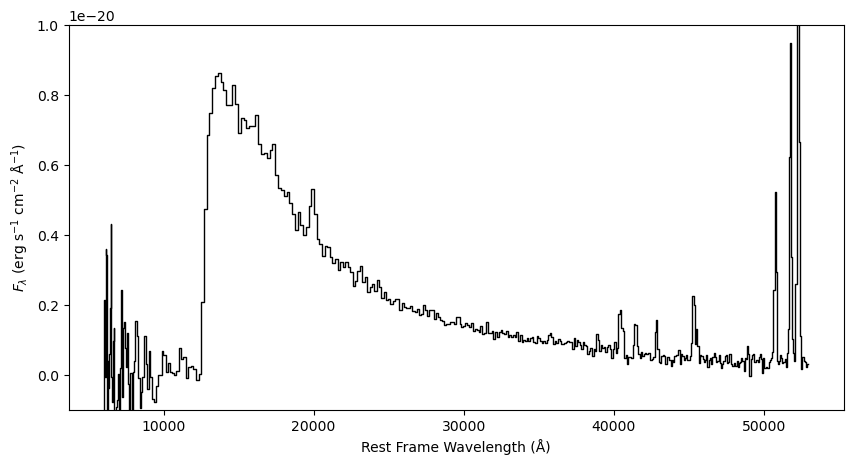

In [5]:
# convert data

# Constants
c = 3e18  # Speed of light in Å/s


# Convert wavelength from microns (µm) to angstroms (Å)
wavelengths_microns = tab['wave']  # Wavelengths in µm
wavelengths_angstroms = wavelengths_microns.to(u.AA)  # Convert to Å

# print wavelength ranges 
print("angstrom observed:",wavelengths_angstroms.min(), wavelengths_angstroms.max())
print("micron observed:",wavelengths_microns.min(), wavelengths_microns.max())

# Flux in µJy
flux_microjy = tab['flux'] # Flux in µJy
flux_err_microjy = tab['err']   # Error in flux in µJy


# Convert flux array to erg/s/cm^2/Å using spectral density equivalency for each wavelength
flux_erg_per_s_cm2_A = flux_microjy.to(u.erg / (u.s * u.cm**2 * u.AA), equivalencies=u.spectral_density(wavelengths_angstroms))
flux_err_erg_per_s_cm2_A = flux_err_microjy.to(u.erg / (u.s * u.cm**2 * u.AA), equivalencies=u.spectral_density(wavelengths_angstroms))


tab['wave_angstroms'] = wavelengths_angstroms
tab['flux_erg_per_s_cm2_A'] = flux_erg_per_s_cm2_A
tab['flux_err_erg_per_s_cm2_A'] = flux_err_erg_per_s_cm2_A


# Convert observed wavelength to rest-frame wavelength
rest_wave_microns = wavelengths_microns / (1 + z)
rest_wave_angstroms = wavelengths_angstroms / (1 + z)

# print wavelength ranges
print("angstrom rest:",rest_wave_angstroms.min(), rest_wave_angstroms.max())
print("micron rest:",rest_wave_microns.min(), rest_wave_microns.max())


# Plotting the data using the rest-frame wavelength
plt.figure(figsize=(10, 5))
plt.plot(wavelengths_angstroms, tab['flux_erg_per_s_cm2_A'], color='black', lw=1, drawstyle='steps-mid')
plt.xlabel('Rest Frame Wavelength (Å)')  
# f subscript lambda label
plt.ylabel(r'$F_{\lambda}$ (erg s$^{-1}$ cm$^{-2}$ Å$^{-1}$)')
#plt.xlim(800, 5500)  
plt.ylim(-0.1e-20, 1.0e-20) 
plt.show()




Initial Fit Results:
[[Model]]
    Model(uv_slope_model)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 26
    # variables        = 2
    chi-square         = 0.02561713
    reduced chi-square = 0.00106738
    Akaike info crit   = -175.987353
    Bayesian info crit = -173.471159
    R-squared          = 0.98196812
[[Variables]]
    beta:         -2.39075786 +/- 0.06613050 (2.77%) (init = -1.5)
    log_FUV_1550: -14.2029206 +/- 0.00973714 (0.07%) (init = -15)
[[Correlations]] (unreported correlations are < 0.100)
    C(beta, log_FUV_1550) = -0.7530


100%|██████████| 5000/5000 [00:02<00:00, 1728.76it/s]


β_UV: -2.39 with 16-84 percentile range: [-2.39, -2.39]
log_FUV_1550: -1.42e+01 with 16-84 percentile range: [-1.42e+01, -1.42e+01]


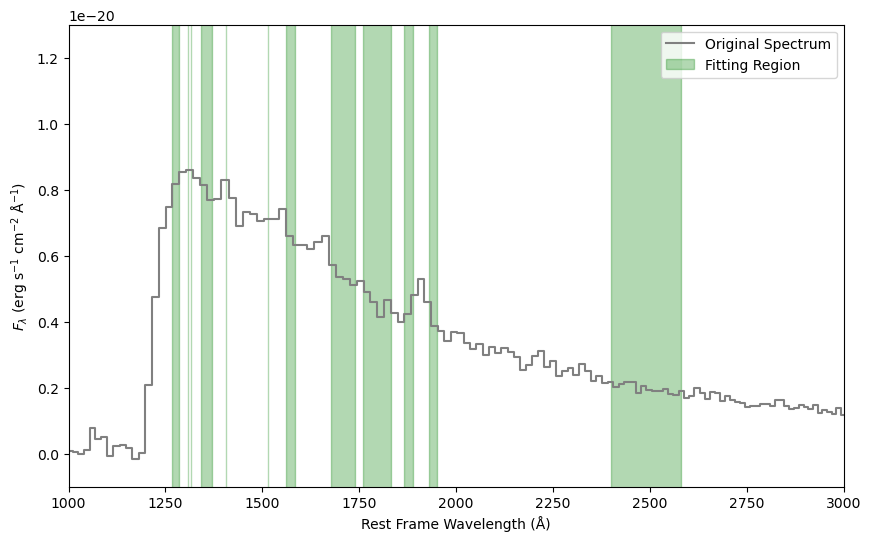

In [8]:
wavelength_masked, regions,weighted_flux, beta_median, beta_ci, log_FUV_1550_median, log_FUV_1550_ci = analyze_uv_spectrum(rest_wave_angstroms.value, tab['flux_erg_per_s_cm2_A'].value, tab['flux_err_erg_per_s_cm2_A'].value, beta=-1.5, log_FUV_1550=np.log10(1e-15))


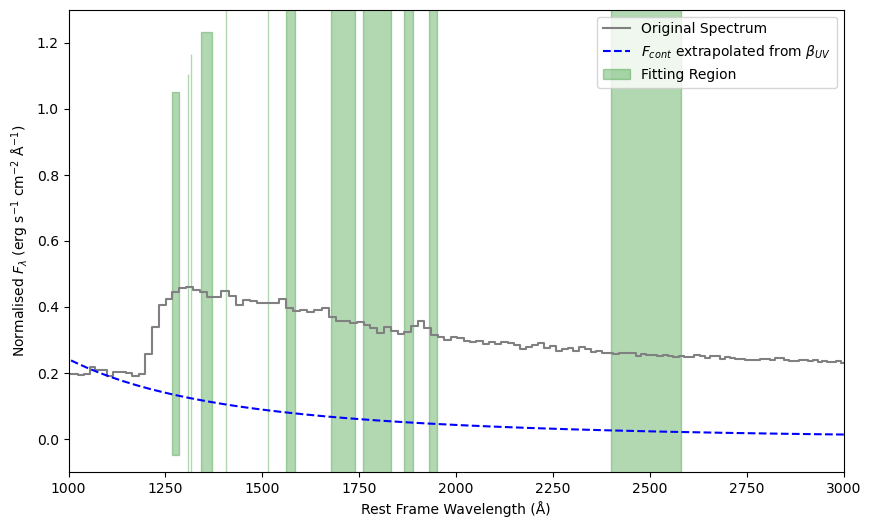

In [10]:
wavelength = rest_wave_angstroms.value
flux = tab['flux_erg_per_s_cm2_A'].value
flux_err = tab['flux_err_erg_per_s_cm2_A'].value

f_cont = extrapolate_continuum(wavelength, beta_median, log_FUV_1550_median)
plot_spectrum_with_continuum(wavelength, flux, wavelength_masked, weighted_flux, f_cont, regions)


In [11]:
DLyA = calculate_damping_parameter(rest_wave_angstroms.value, tab['flux_erg_per_s_cm2_A'].value, f_cont, z)
print(f"LyA Damping Parameter (D_LyA): {DLyA:.3f}")

LyA Damping Parameter (D_LyA): -30.693
